# Assignment 2
# Reading and Plotting Radiosonde Data

## Introduction

Radiosondes provide measurements of the atmospheric pressure, temperature, and relative humidity with height.  They can also be used to measure the horizontal wind speed and direction by tracking their movements in the atmosphere after being released.  In this assignment, we will use radiosonde data as a means of demonstrating file input / output in Python and further develop your competency in the language.

There are several resources available through the internet for retrieving and displaying radiosonde data.  We will be using the University of Wyoming web site available through __[weather.uwyo.edu/upperair/sounding.html](http://weather.uwyo.edu/upperair/sounding.html)__ The site provides easy access to sounding data from around the globe and going back to 1973 through a graphical user interface (GUI).  Although radiosonde data in their raw form only include pressure, temperature, and humidity, the University of Wyoming site provides several other parameters as well.  These include various potential temperatures and sounding indices.

## Background

In the drop-down menu called $\verb+Type of Plot+$ on the web site, there is an option called $\verb+Text: List+$.  If this is active when a station and time is selected, then you get an output field resembling

$\verb+72357 OUN Norman Observations at 12Z 12 Jul 2020+$<br>
                                                              
$\verb+   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV+$<br>
$\verb+    hPa     m      C      C      %    g/kg    deg   knot     K      K      K +$<br><br>
$\verb+ 1000.0     95                                                               +$<br>
$\verb+  973.0    345   34.2    22.2      50   17.66     90     8   309.8   363.9   313.0+$<br>
$\verb+  945.0    610   31.2    20.4      53   16.20    110     9   309.3   358.9   312.3+$<br>
$\verb+  925.0    804   29.0    19.0      55   15.19    120    10   309.0   355.4   311.8+$<br>
$\verb+  913.5    914   28.1    18.5      56   14.90    125    11   309.1   354.6   311.9+$<br>
$\verb+  .+$<br>
$\verb+  .+$<br>
$\verb+  .+$<br>
This is not exactly how the output appears, but it is what I can manage in Jupyter Notebook.

I am providing a Python script called $\verb+getWyoming+$ that allows you to automatically download sounding data from the University of Wyoming web site. The script can be found in $\verb+utils+$. To call the routine you specify the year, month, day, hour, and site you would like to consider. For example, if you are interested in downloading the data for the Norman site (OUN) with a site designator of 72357 for the 12-Z sounding on July 4, 2019, you could use the following commands

In [1]:
import utils
procYear, procMonth, procDay, procHour, procSite = 2020, 7, 4, 0, 72357
soundingInfo, p, h, T, Td, RH, w, wdir, sknt, thta, thte, thtv = \
    utils.getWyoming(procYear, procMonth, procDay, procHour, procSite)

72357 OUN Norman Observations at 00Z 04 Jul 2020


If you would like to plot the temperature in C versus height in km, then you would simply need to use

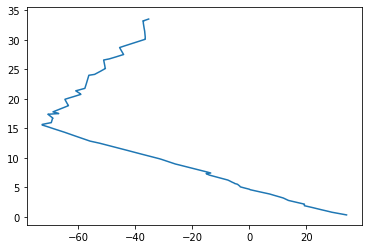

In [3]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(T, h/1e3)
plt.show()

Using the hypsometric equation, radiosonde values for pressure and temperature can be converted to height.  That is, assuming that the atmosphere is in hydrostatic balance
$$
\begin{equation}
\frac{\partial p}{\partial z} = -\rho g
\end{equation}
$$
and using the ideal gas law for air
$$
\begin{equation}
p = \rho R_d T_v
\end{equation}
$$
we can write
$$
\begin{equation}
\frac{\partial \ln p}{\partial z} = -\frac{g}{R_d T_v}.
\end{equation}
$$
Integrating from height $z_1$ where the pressure is $p_1$ to height $z_2$ where the pressure is $p_2$ we find
$$
\begin{equation}
\Delta z = z_2 - z_1 = \frac{R_d \, \overline{T_v}}{g}\ln \left[\frac{p_1}{p_2}\right]
\end{equation}
$$
where
$$
\begin{equation}
\overline{T_v} \equiv \frac{\int_{p_2}^{p_1}\,T_v\,d \ln p}{\int_{p_2}^{p_1}\,d \ln p}
\label{eq:Tv}
\end{equation}
$$
A function is being provided for you that approximates the calculation of $\overline{T_v}$ using sounding data.  The function is called $\verb+mean_temp_calc+$ in $\verb+utils.py+$ and takes virtual temperature, pressure, a minimum pressure, and a maximum pressure as inputs.  The input minimum and maximum pressures are target values.  That is, the routine looks for values that fulfill $T_{min} \le T \le T_{max}$. The outputs are $\overline{T_v}$ along with the actual minimum and maximum pressure available within the desired target range.

## Assignment

Create a PDF report including the following:
* Name of the course, Your name, and the date on a stand-alone page. That is, the first page will only include this information.
* The figures discussed below (with numbers and captions) that you will create using Python.
* The code that you used to produce the figures.  Your code should be included at the end of the document as an appendix.  You do not need to include the provided code in $\verb+utils.py+$
* Responses to the questions given below. You should not reproduce the question per se in the document but rather you should be sure address the question within the body of your text.

The report should be uploaded to Canvas when you are done.  Failure to follow these instructions will result in a loss of points.  Sending the report in PDF makes it easier to grade and mitigates formatting inconsistencies across different computer platforms that might occur.  Moreover, you should provide a discusion in the report to introduce the question that you are addressing, without reproducing the question verbatim from this assignment. Recall that the report is meant to read as an exploratory document rather than a homework assignment.

Obtain sounding observations for OUN Norman at 00Z on 4 July 2020 and at 12Z on 4 July 2020. Complete the following using these data.  That is, you should follow these steps for *each* sounding.

* Create a height array that goes from 0 to 30000 m in steps of 100 m.  Create arrays of pressure and temperature based on the standard atmosphere for each of these heights (using $\verb+atmoshere+$) contained in $\verb+utils+$. Note that this is similar to what you did for the first assignment.
* Create a first set of plots (one figure for the first sounding and one figure for the second sounding) that displays temperature data from the sounding (in K) over all measured heights together with temperature data from the standard atmosphere model (also in K).  That is, show height on the y-axis (in km) and temperature on the x-axis.  Label the x-axis as 'Temperature (K)' and the y-axis as 'Height MSL (km)', where MSL = mean sea level.  Provide a title for the plot which displays the information contained in $\verb+soundingInfo+$.  See example code and resultuing plot shown below. I have not added axis labels and such intentionally, but you should include these features in your plot. Include the resulting image (with caption and figure number) in your report.

# Plots

72357 OUN Norman Observations at 00Z 04 Jul 2020


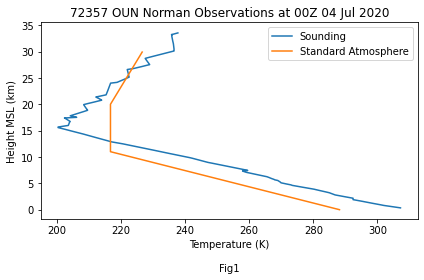

72357 OUN Norman Observations at 12Z 04 Jul 2020


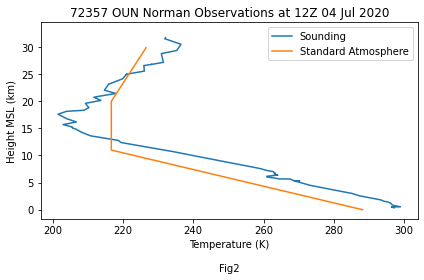

72357 OUN Norman Observations at 00Z 04 Jul 2020


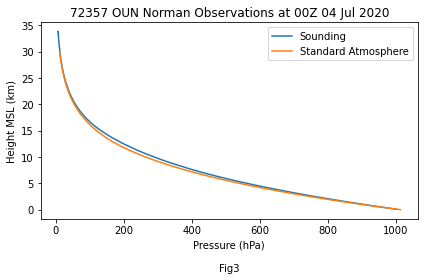

72357 OUN Norman Observations at 12Z 04 Jul 2020


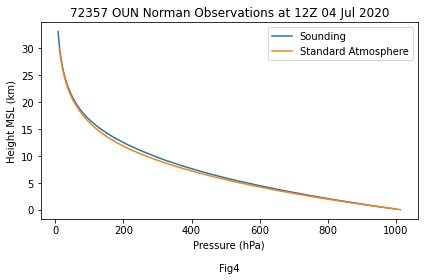

72357 OUN Norman Observations at 00Z 04 Jul 2020


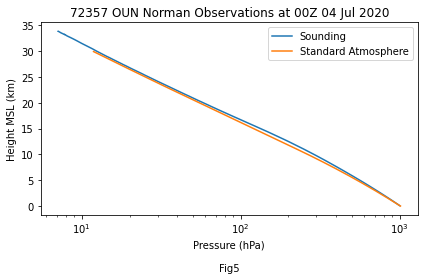

72357 OUN Norman Observations at 12Z 04 Jul 2020


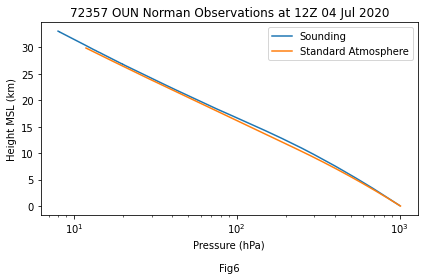

72357 OUN Norman Observations at 00Z 04 Jul 2020


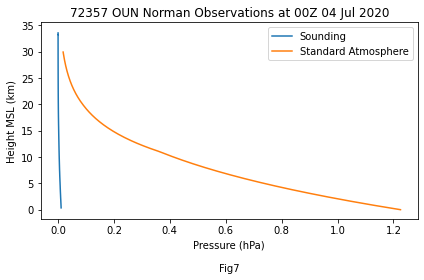

72357 OUN Norman Observations at 12Z 04 Jul 2020


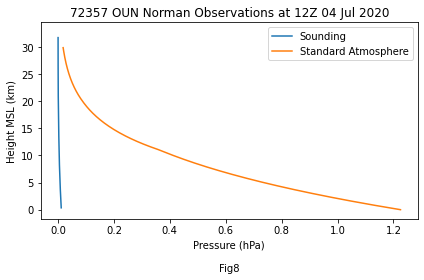

In [3]:
# Import the needed resources
import utils
import numpy as np
import matplotlib.pyplot as plt

# Range of heights in meters and step size
ht_min = 0
ht_max = 30000
ht_del = 100

# Define the heights and calculate the corresponding parameters using the 
# US Standard Atmosphere
height_std = np.arange(ht_min, ht_max, ht_del)
T_std, p_std, rho_std, a_std = utils.atmosphere(height_std)

#one sounding at 0Z, and one at 12Z
idx=1
for hour in [0, 12]:
    procYear, procMonth, procDay, procHour, procSite = 2020, 7, 4, hour, 72357
    soundingInfo, p, h, T, Td, RH, w, wdir, sknt, thta, thte, thtv = \
        utils.getWyoming(procYear, procMonth, procDay, procHour, procSite)
    plt.figure(1)
    plt.xlabel('Temperature (K)\n\nFig{}'.format(str(idx))) #labeling x axis
    plt.ylabel('Height MSL (km)') #labeling y axis
    plt.title(soundingInfo) #adding title
    plt.plot(T+273, h/1e3)
    plt.plot(T_std, height_std/1e3)
    plt.legend(['Sounding', 'Standard Atmosphere']) #adding a legend
    plt.tight_layout()
    plt.savefig('Temperature {}Z'.format(hour))
    plt.show()
    idx+=1
    
for hour in [0, 12]:
    procYear, procMonth, procDay, procHour, procSite = 2020, 7, 4, hour, 72357
    soundingInfo, p, h, T, Td, RH, w, wdir, sknt, thta, thte, thtv = \
        utils.getWyoming(procYear, procMonth, procDay, procHour, procSite)
    plt.figure(1)
    plt.xlabel('Pressure (hPa)\n\nFig{}'.format(str(idx))) 
    plt.ylabel('Height MSL (km)')
    plt.title(soundingInfo) 
    plt.plot(p, h/1e3)
    plt.plot(p_std/100, height_std/1e3)
    plt.legend(['Sounding', 'Standard Atmosphere'])
    plt.tight_layout()
    plt.savefig('Pressure {}Z'.format(hour))
    plt.show()
    idx+=1
for hour in [0, 12]:
    procYear, procMonth, procDay, procHour, procSite = 2020, 7, 4, hour, 72357
    soundingInfo, p, h, T, Td, RH, w, wdir, sknt, thta, thte, thtv = \
        utils.getWyoming(procYear, procMonth, procDay, procHour, procSite)
    plt.figure(1)
    plt.xlabel('Pressure (hPa)\n\nFig{}'.format(str(idx))) 
    plt.ylabel('Height MSL (km)')
    plt.title(soundingInfo) 
    plt.semilogx(p, h/1e3)
    plt.semilogx(p_std/100, height_std/1e3)
    plt.legend(['Sounding', 'Standard Atmosphere'])
    plt.tight_layout()
    plt.savefig('Pressure Semilog {}Z'.format(hour))
    plt.show()
    idx+=1
    
for hour in [0, 12]:
    procYear, procMonth, procDay, procHour, procSite = 2020, 7, 4, hour, 72357
    soundingInfo, p, h, T, Td, RH, w, wdir, sknt, thta, thte, thtv = \
        utils.getWyoming(procYear, procMonth, procDay, procHour, procSite)
    plt.figure(1)
    plt.xlabel('Pressure (hPa)\n\nFig{}'.format(str(idx))) 
    plt.ylabel('Height MSL (km)')
    plt.title(soundingInfo) 
    plt.plot(p/(287*(T+273.15)), h/1e3)
    plt.plot(rho_std, height_std/1e3)
    plt.legend(['Sounding', 'Standard Atmosphere'])
    plt.tight_layout()
    plt.show()
    idx+=1

# Calculations

In [2]:
for hour in [0, 12]:
    procYear, procMonth, procDay, procHour, procSite = 2020, 7, 4, hour, 72357
    soundingInfo, p, h, T, Td, RH, w, wdir, sknt, thta, thte, thtv = \
        utils.getWyoming(procYear, procMonth, procDay, procHour, procSite)
    w=w/1000 #converting from g/kg to kg/kg
    T = T+273 
    height925 = h[np.argmin(np.abs(925-p))]
    height700 = h[np.argmin(np.abs(700-p))]
    thickness = height700-height925
    print("Height at 925 hPa: {} m\nHeight at 700 hPa: {} m\nThickness: {} m".format(height925, height700, thickness))
    
    vt = (T)*(1+0.61*w) #virtual temperature
    mean_vt = utils.mean_temp_calc(vt, p, 925, 700)[0] #function returns three values, only want the first one
    print("Mean Virtual Temperature: {} K".format(round(mean_vt,2)))
    
    thickness_hypso = ((287*mean_vt)/9.81)*np.log(925/700)
    print("Theoretical Layer Thickness: {} m".format(round(thickness_hypso,2)))

    approx_mean_vt = (vt[np.argmin(abs(925-p))]+vt[np.argmin(abs(700-p))])/2
    print("Approximate Mean Virtual Temperature: {} K".format(round(approx_mean_vt,2)))
    
    thickness_approx = ((287*approx_mean_vt)/9.81)*np.log(925/700)
    print("Theoretical Layer Thickness (Approximate Mean VT): {} m".format(round(thickness_approx,2)))

    print('\n')



72357 OUN Norman Observations at 00Z 04 Jul 2020
Height at 925 hPa: 804.0 m
Height at 700 hPa: 3208.0 m
Thickness: 2404.0 m
Mean Virtual Temperature: 294.55 K
Theoretical Layer Thickness: 2401.73 m
Approximate Mean Virtual Temperature: 295.31 K
Theoretical Layer Thickness (Approximate Mean VT): 2407.97 m


72357 OUN Norman Observations at 12Z 04 Jul 2020
Height at 925 hPa: 794.0 m
Height at 700 hPa: 3187.0 m
Thickness: 2393.0 m
Mean Virtual Temperature: 293.15 K
Theoretical Layer Thickness: 2390.32 m
Approximate Mean Virtual Temperature: 292.29 K
Theoretical Layer Thickness (Approximate Mean VT): 2383.3 m




* Create a second set of plots (one figure for the first sounding and one figure for the second sounding) that displays pressure data from the sounding (in hPa) over all measured heights together with pressure data from the standard atmosphere model (also in hPa).  That is, show height on the y-axis (in km) and pressure on the x-axis.  Label the x-axis as 'Pressure (hPa)' and the y-axis as 'Height MSL (km)'.  Provide a title for the plot which displays the information contained in $\verb+soundingInfo+$.  Include the file (with caption and figure number) in your report.
* Create a third set of plots (one figure for the first sounding and one figure for the second sounding) that displays pressure data from the sounding (in hPa) over all measured heights together with pressure data from the standard atmosphere model (also in hPa).  This is similar to Figure 2, except that you will use $\verb+semilogx+$ instead of $\verb+plot+$ to plot the data.  The y-axis will be linear and the x-axis logarithmic.  Label the x-axis as 'Pressure (hPa)' and the y-axis as 'Height MSL (km)'.  Provide a title for the plot which displays the information contained in $\verb+soundingInfo+$.  Include the file (with caption and figure number) in your report.
* Using the values reported in the sounding data file for both soundings, find the height (mean sea level) of the 925-hPa and 700-hPa levels.  Note, theses are 'required levels' and should be present in the data file. What is the reported height of these levels for both soundings? What is the thickness of the layer bounded by these pressure levels based on the reported heights?
* Using the values of temperature and the water vapor mixing ratio in both the sounding data files, calculate the corresponding virtual temperatures.  Next calculate the mean virtual temperatures $\overline{T_v}$, as defined by the equation listed above, between $p_{max} = 925$ hPa and $p_{min} = 700$ hPa using $\verb+mean_temp_calc+$ in $\verb+utils+$. What is the mean virtual temperature for both soundings?
* Using the hypsometric equation and the calculated values for $\overline{T_v}$ for both soundings, find the thickness of the layer bounded by the 925-hPa and 700-hPa levels. What is the calculated thickness for both soundings?
* Now find the approximate mean virtual temperature across the layer for both soundings as the average of the virtual temperature at the 925-hPa and 700-hPa levels. What are these values of the approximate mean temperature?
* Next use these approximate mean virtual temperatures in the hypsometric equation for both profiles to calculate layer thickness. What the layer thicknesses for both profiles?

Based on your calculations and plots for the two sets of sounding data, answer the following questions:

$\underline{Question}$: How do you account for the agreement / disparity between the actual measurements and the standard atmosphere regarding temperature / pressure for both soundings?

$\underline{Question}$: Based on these results, would you expect good agreement between the density profiles from the soundings and standard atmosphere for both soundings?  

$\underline{Question}$: How do you account for the agreement / differences between the calculations of the layer thickness obtained from the three different methods for both soundings?

## Q 1

The standard atmosphere is a static model of the vertical profile of both temperature and pressure derived from assumptions of hydrostatic equilibrium, the atmosphere acting as an ideal gas, the atmosphere having a constant lapse rate throughout the troposphere with an average surface temperature of 288 K, and the atmosphere being relatively dry. The values of temperature and pressure given by the standard atmosphere will thus differ from actual measurements taken from radiosandes (like the measurements seen in both soundings) when the aforementioned assumptions are invalid and will agree when the assumptions hold true. 

For both soundings, the surface temperature is warmer than 288 K (as one would expect for July in the Midwest), so the standard atmospheric temperature profile has a negative bias. Additionally, for both soundings, the average enviromental lapse rate observed by the radiosande is approximately linear but slightly larger in magnitude than the standard atmospheric lapse rate, which will introduce disparity for both temperature and pressure, as the pressure profile assumes a standard atmospheric lapse rate. Therefore, the miniscule pressure differences between the standard atmosphere and the radiosande values from around 5 km to 15 km heights could be resulting from the standard atmospheric temperature bias. However, the pressure profiles for both soundings generally agree with the standard atmosphere's predictions. Experimental error calculations using the Van der Waal's equation (an equation of state similar to the Ideal Gas Law that applies to non-ideal gases) indicates that the density of the atmosphere is generally low enough to avoid significant errors from the ideal gas assumption. Additionally, Norman typically experiences calmer (and dryer) weather during the summer, which means negligible vertical accelerations and the suitability of the dry air gas constant. The validity of these three assumptions, and the surface pressure of both soundings roughly equalling the standard surface pressure, would explain the general accuracy of the standard atmosphere's vertical pressure profile for the two soundings. 


## Q 2

Assuming the atmosphere behaves as an ideal gas, which, as previously mentioned, is a safe assumption for both soundings, density can be represented as P/RT, meaning density is a function of both pressure and temperature. Since the temperature profile of the standard atmosphere is negatively biased for both soundings throughout the troposphere, it would be expected that the density predicted by the standard atmosphere would be considerably larger than the actual observed density of both soundings. 

## Q 3 

With the data for both soundings, 925-700 hPa layer thickness was computed using three methods. The first method was simply computing the difference between the height at the pressure value nearest the layer boundary pressure levels from the sounding data, which can be interpeted as the "true" experimental layer thickness value. The final two methods all involved calculating the theoretical layer thickness using the hypsometric equation, with the difference between the two methods being the calculation of the mean layer virtual temperature; one method calculated a weighted average of the virtual temperature values within the layer computed using the soundings' mixing ratio and temperature data, whereas the final method assumed a constant lapse rate and interpreted the mean virtual temperature as the average of the two boundary virtual temperatures. The first theoretical method was by far the more accurate of the two, with an absolute error of roughly 2.27 meters for the first sounding and 2.68 meters for the second, in contrast to absolute errors of 24.77 and 16.7 meters for the final method. The first theoretical computation was slightly off because the vertical resolution of virtual temperature data taken by the soundings was 100 meters, meaning the weighted average of the virtual temperature computed could not account for temperature variations in the layer at small scales, which would make the computed weighted average slightly different from the true mean virtual temperature of the layer. However, the theoretical value for this method still had a very low relative errors, which means that the ideal gas assumption, the assumption of hydrostatic equilibrium, and the dry air assumption used in the derivation of the hypsometric equation were approximately valid for both of the soundings. The final method was not nearly as accurate due to its incorrect assumption of a constant lapse rate in the layers for both soundings, as figures 1 and 2 indicate that, for the height ranges associated with the 925-700 hPa layers of both soundings, the lapse rate is not perfectly linear, and even, in the case of the 12Z sounding, has minor inversions near the surface. 


